# Import Software Packages

In [1]:
import warnings  # Suppress warnings
from time import time  # Calculate training time.

import matplotlib
import numpy as np
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
from sklearn import datasets

warnings.filterwarnings("ignore")

# Summarize software libraries used.
print("Libraries used in this project:")
print("- NumPy {}".format(np.__version__))
print("- Matplotlib {}".format(matplotlib.__version__))
print("- scikit-learn {}\n".format(sklearn.__version__))

Libraries used in this project:
- NumPy 1.22.3
- Matplotlib 3.8.4
- scikit-learn 1.2.2



# Load the Dataset

When you begin working with a dataset, it's beneficial to review the data description to uncover insights that you can gain right from the start.

In [2]:
digits = datasets.load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

**Spotlights**

- The images of the digits are sized at 8 by 8 pixels
- The dataset originates from Bogazici University located in Istanbul, Turkey.
- There are 64 attributes in the dataset.
- There are no missing values.

### Examine Dataset Samples

In [20]:
df = pd.DataFrame(digits.data, columns=digits.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


**Spotlights**

Each entry consists of a collection of 64 values that correspond to the colors of the pixels in an image, ranging from 0 to 16. In this scale, 0 signifies white, while 16 indicates black.

### Examine the Dataset 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

**Spotlights** 

- There are 1797 records.
- There are 64 attributes in the dataset all of which are float values.
- There are no missing records.
- The column names are pixel_0_0 - pixel_7_7

### Create Target Labels

In [6]:
labels = pd.DataFrame(digits.target)

In [21]:
labels

,0
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


**Spotlights**

This indicates that the initial data point in the collection was labeled as a 0, while the final one received a label of 8.

### Count Unique Labels

In [7]:
lcount = len(labels.value_counts())
print(f"There are {lcount} distinct labels (0 - {lcount - 1}).")

There are 10 distinct labels (0 - 9).


### Count Label Classes

In [8]:
labels.value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
dtype: int64

### Plot Target Label Distributions

<Axes: title={'center': 'Count Label(0-9) Distrbutions'}, ylabel='0'>

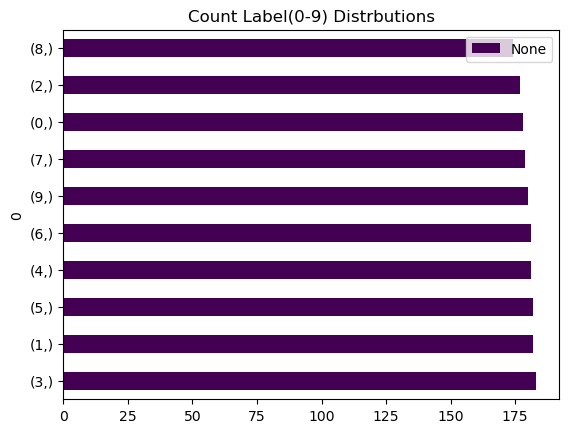

In [9]:
labels.value_counts(ascending=False).plot(
    kind="barh",
    title="Count Label(0-9) Distrbutions",
    grid=False,
    legend=True,
    cmap="viridis",
)

**Spotlights**

- The plot suggests that the distributions are nearly balanced. This reinforces the class label counts which range from 174 - 183.
- Label 3 has the highest total at 183.